Time series data is chronologically arranged data series which has preferably fixed interval of time between each data point in the series.

Importing a time series data for preparation

In [3]:
import pandas as pd
df = pd.read_csv("Index2018.csv")
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


Look at the summary

In [4]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


Check for nulls and handle nulls if needed

In [5]:
df.isna().sum(axis=0)
# df = df.fillna(method='ffill')

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

A `Q-Q Plot` helps understand how the data is distributed alongside a Normal distribution

In [6]:
import scipy.stats
import pylab

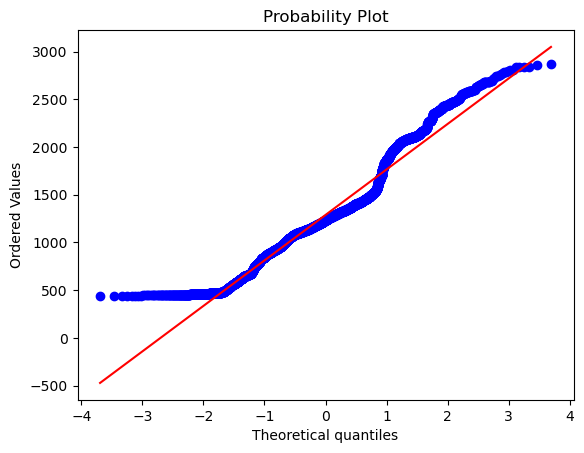

In [7]:
scipy.stats.probplot(df['spx'],plot=pylab)
pylab.show()

The data skewed at value of 500 shows that it is not normally distributed. 

`to_datetime` from pandas gives the functionality to convert string to datetime values from any stable format of date kind of strings.

| Directive | Meaning                                 | Example Output     |
|-----------|------------------------------------------|--------------------|
|**%Y**      | Year with century                        | 2025               |
| %y        | Year without century (00–99)             | 25                 |
| **%m**        | Month as zero-padded decimal (01–12)     | 08                 |
| %B        | Full month name                          | August             |
| **%b**        | Abbreviated month name                   | Aug                |
| **%d**        | Day of the month (01–31)                 | 30                 |
| %A        | Full weekday name                        | Saturday           |
| %a        | Abbreviated weekday name                 | Sat                |
| %w        | Weekday as decimal (0=Sunday)            | 6                  |
| %H        | Hour (24-hour clock)                     | 13                 |
| %I        | Hour (12-hour clock)                     | 01                 |
| %p        | AM or PM                                 | PM                 |
| %M        | Minute (00–59)                           | 10                 |
| %S        | Second (00–59)                           | 45                 |
| %f        | Microsecond (000000–999999)              | 123456             |
| %z        | UTC offset                               | +0530              |
| %Z        | Time zone name                           | IST                |
| %j        | Day of the year (001–366)                | 243                |
| %U        | Week number (Sunday as first day)        | 35                 |
| %W        | Week number (Monday as first day)        | 34                 |
| %c        | Locale’s date and time                   | Sat Aug 30 13:10:45 2025 |
| %x        | Locale’s date                            | 08/30/25           |
| %X        | Locale’s time                            | 13:10:45           |
| %%        | Literal '%' character                    | %                  |


In [10]:
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y")

Check if the conversion happened properly

In [11]:
df['date'].describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

The `date` column can be used as index for the timeseries for easier reference

In [12]:
df.set_index('date',inplace=True)

In [14]:
df.head(3)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


As timeseries requires a standard interval (preferably constant interval), we need to assign a frequency based on the understanding gained from exploration. As we see daily data, we can try setting the series to daily frequency.

In [16]:
df = df.asfreq('D')

In [18]:
df.head(10)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26
1994-01-14,474.91,2151.05,3400.56,18973.70
1994-01-15,NaN,NaN,NaN,NaN


Though we have daily data, the data is not continuous as it is evident after finding `NaN` values for some dates. It looks like the data is not available for weekends. We can handle this by using `business days` as frequency.

In [20]:
df = df.asfreq('b')

In [21]:
df.head(10)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26
1994-01-14,474.91,2151.05,3400.56,18973.70
1994-01-17,473.30,2115.56,3407.83,18725.37
1994-01-18,474.25,2130.35,3437.01,18514.55
1994-01-19,474.30,2132.52,3475.15,19039.40


Check for missing values as the `asfreq` method can create new dates based on the set frequency.

In [26]:
df.isna().sum(axis=0)  # adding along the rows. Hence axis=0

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

Presence of NAs afted setting the frequency to business days indcate that there is no data available for specific business days

We can fill the NA values using either `ffill` method or `bfill` method as filling with `mean` might introduce peaks/troughs unless carefully done. While a snapshot data or a non-timeseries data can fill NAs with means, zeroes, constants etc, `ffill` or `bfill` remain safe methods of filling the missing values.

In [30]:
for col in df.columns.to_list():
    df[col] = df[col].fillna(method='ffill')

C:\Users\aravi\AppData\Local\Temp\ipykernel_3696\12832214.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')


In [31]:
df.isna().sum(axis=0)

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

We can keep the series that are needed and drop other series before model building.

In [33]:
df = df.drop(columns = ['dax','ftse','nikkei'])

In [35]:
df.head(3)

,spx
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13


As chronological order is important for time series, the train-test split cannot be created by random split. The preferred way to do the split is by choosing the first 80% of dates into training set and the remaining dates in sequence for testing/validation.

In [40]:
test_size = int(len(df)*0.8)

df_train = df.iloc[:test_size]
df_test = df.iloc[test_size:]

Check for possible overlaps

In [43]:
df_train.tail(3)

,spx
date,
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [45]:
df_test.head(3)

,spx
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827


As 5th of April, 2013 was a Friday, we understand that the data is not available for Saturday and Sunday. So the next data point is going to be 8th April which is the first date of testing set.